<a href="https://colab.research.google.com/github/shubhangsrivastav/Machine-Learning-Projects/blob/main/Housing_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
from google.colab import files
uploaded= files.upload()

Saving data.csv to data.csv


In [3]:
df = pd.read_csv('data.csv')

In [4]:
df


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 00:00,3.130000e+05,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 00:00,2.384000e+06,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 00:00,3.420000e+05,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 00:00,4.200000e+05,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 00:00,5.500000e+05,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,09-07-2014 00:00,3.081667e+05,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,09-07-2014 00:00,5.343333e+05,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,09-07-2014 00:00,4.169042e+05,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,10-07-2014 00:00,2.034000e+05,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le=LabelEncoder()

In [7]:
df['Code_country']=le.fit_transform(df.country)
df['Code_city']=le.fit_transform(df.city)
df['Code_statezip']=le.fit_transform(df.statezip)
df['Code_street']=le.fit_transform(df.street)
df['Code_date']=le.fit_transform(df.date)


In [8]:
df.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,Code_country,Code_city,Code_statezip,Code_street,Code_date
4595,09-07-2014 00:00,308166.6667,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA,0,35,62,3447,25
4596,09-07-2014 00:00,534333.3333,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,0,3,6,960,25
4597,09-07-2014 00:00,416904.1667,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,0,32,37,4033,25
4598,10-07-2014 00:00,203400.0000,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA,0,35,71,3498,28
4599,10-07-2014 00:00,220600.0000,3,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA,0,9,26,1514,28


In [9]:
df.info

<bound method DataFrame.info of                   date         price  ...  Code_street  Code_date
0     02-05-2014 00:00  3.130000e+05  ...         1522          2
1     02-05-2014 00:00  2.384000e+06  ...         3899          2
2     02-05-2014 00:00  3.420000e+05  ...         2291          2
3     02-05-2014 00:00  4.200000e+05  ...         4263          2
4     02-05-2014 00:00  5.500000e+05  ...         4352          2
...                ...           ...  ...          ...        ...
4595  09-07-2014 00:00  3.081667e+05  ...         3447         25
4596  09-07-2014 00:00  5.343333e+05  ...          960         25
4597  09-07-2014 00:00  4.169042e+05  ...         4033         25
4598  10-07-2014 00:00  2.034000e+05  ...         3498         28
4599  10-07-2014 00:00  2.206000e+05  ...         1514         28

[4600 rows x 23 columns]>

In [10]:
df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,Code_country,Code_city,Code_statezip,Code_street,Code_date
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.0,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,0.0,25.674348,38.743696,2265.385870,35.271739
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,0.0,11.982721,20.919517,1307.591795,19.733429
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,0.0,17.000000,21.000000,1132.750000,19.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,0.0,32.000000,41.000000,2263.500000,35.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,0.0,35.000000,56.000000,3400.250000,53.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,0.0,43.000000,76.000000,4524.000000,69.000000


In [11]:
df.corr()['price'].sort_values(ascending=True)

Code_statezip   -0.043385
yr_renovated    -0.028774
Code_date       -0.022127
Code_city        0.018625
yr_built         0.021857
Code_street      0.029366
condition        0.034915
sqft_lot         0.050451
waterfront       0.135648
floors           0.151461
bedrooms         0.200336
sqft_basement    0.210427
view             0.228504
bathrooms        0.327110
sqft_above       0.367570
sqft_living      0.430410
price            1.000000
Code_country          NaN
Name: price, dtype: float64

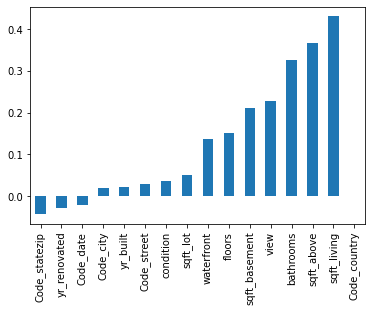

In [12]:
df.corr()['price'][2:18].sort_values().plot(kind='bar')

In [13]:
df.shape

(4600, 23)

In [14]:
#check for the missing value
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
Code_country     0
Code_city        0
Code_statezip    0
Code_street      0
Code_date        0
dtype: int64

In [31]:
df.drop('city',axis=1,inplace=True)

In [33]:
df.drop('street',axis=1,inplace=True)

In [36]:
df.drop('statezip',axis=1,inplace=True)

In [35]:
df.drop('date',axis=1,inplace=True)

In [37]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,Code_country,Code_city,Code_statezip,Code_street,Code_date
0,3.130000e+05,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,0,36,62,1522,2
1,2.384000e+06,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,0,35,58,3899,2
2,3.420000e+05,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,0,18,26,2291,2
3,4.200000e+05,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,0,3,7,4263,2
4,5.500000e+05,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,0,31,31,4352,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,0,35,62,3447,25
4596,5.343333e+05,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,0,3,6,960,25
4597,4.169042e+05,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,0,32,37,4033,25
4598,2.034000e+05,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,0,35,71,3498,28


In [38]:
x= df.drop('price',axis=1)

In [39]:
y=df['price']

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [41]:
print(x.shape,x_train.shape,x_test.shape)

(4600, 17) (3220, 17) (1380, 17)


In [42]:
model=XGBRegressor()

In [43]:
model.fit(x_train,y_train)

[11:25:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [44]:
#accuracy for prediction on training data
training_data_prediction = model.predict(x_train)

In [45]:
print(training_data_prediction)

[432431.53 509898.66 525942.7  ... 431691.62 421478.62 588530.06]


In [47]:
# R squared error
score_1=metrics.r2_score(y_train,training_data_prediction)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_train,training_data_prediction)
print(score_1)
print(score_2)

0.7677457993566308
120558.87137311723


In [48]:
#accuracy for prediction on test data
test_data_prediction = model.predict(x_test)

In [49]:
# R squared error
score_1=metrics.r2_score(y_test,test_data_prediction)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test,test_data_prediction)
print(score_1)
print(score_2)

0.13657873848160929
148753.11565569747


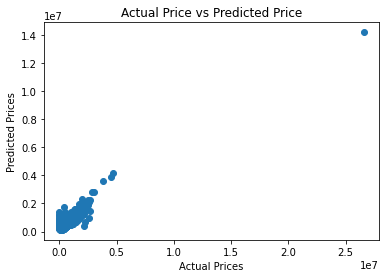

In [53]:
#visualisation of actual prices on predicted value
plt.scatter(y_train,training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Price vs Predicted Price')
plt.show()

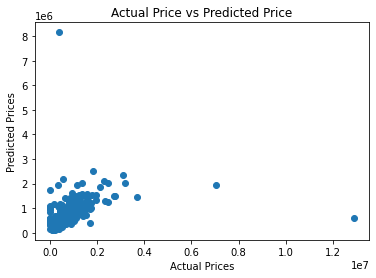

In [54]:
#visualisation of actual prices on predicted value
plt.scatter(y_test,test_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Price vs Predicted Price')
plt.show()